# Bank Customer's Churn Classification¶
## 06/20/2024
### Classifying bank customers based on their previous bank activities, that they will exit/leave the bank or not.

##### importing the required libraries


In [5]:
import numpy as np 
import pandas as pd 


##### Loading dataset



In [6]:
df_churn=pd.read_csv('Churn_Modelling.csv')

In [7]:
df_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data exploiration

In [8]:
df_churn.shape

(10000, 14)

In [11]:
df_churn.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
### dependent features 
##dep_fe "'CreditScore', 'Geography',
      # 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
      # 'IsActiveMember', 'EstimatedSalary'"

In [ ]:
# independent_features = "Exited"

In [12]:
df_churn.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [13]:
df_churn.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [14]:
df_churn.isna()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
df_churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [17]:
df_churn.duplicated().value_counts()

False    10000
Name: count, dtype: int64

#### Importing libraries for data visualization


In [18]:
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 


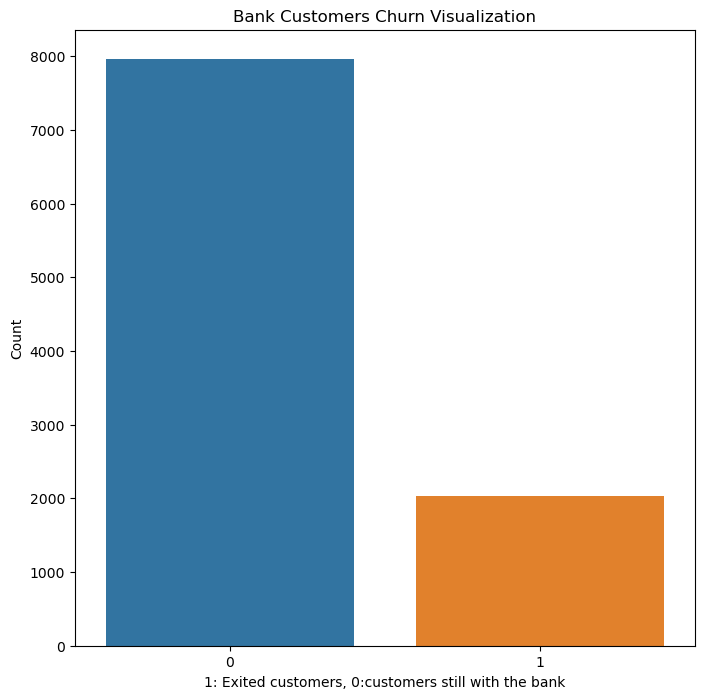

In [22]:
## VVisualize exited customers 

plt.figure(figsize=(8, 8))
sns.countplot(x='Exited', data=df_churn)
plt.xlabel('1: Exited customers, 0:customers still with the bank')

plt.ylabel('Count')
plt.title('Bank Customers Churn Visualization')
plt.show()

### Key take away: More customers are still with the bank (about 90 percent)


In [23]:
df_churn.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [24]:
df_churn['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [25]:
df_churn['EstimatedSalary'].sum()

1000902398.8100001

### Descritive Statistics 

In [26]:
df_churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Key take away:
##### Average age of customers: 39
##### Minimum age of customers: 18 years 
##### 50 percent of customers are above 37 years
##### Oldest customer is : 92 years



### Time to drop unnecessary columns (features)


In [71]:
df_churn.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)


KeyError: "['RowNumber', 'CustomerId', 'Surname'] not found in axis"

In [72]:
df_churn.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Germany', 'Spain',
       'Male'],
      dtype='object')

In [31]:
df_churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [73]:
df_churn['Geography']

KeyError: 'Geography'

### Feature Engineering (converting categorical features into numerical features for the ml algorithms to process)

In [74]:
## Convert 'Gender' and 'Geography' columns

geography=pd.get_dummies(df_churn['Geography'], drop_first=True)
gender=pd.get_dummies(df_churn['Gender'], drop_first=True)


KeyError: 'Geography'

In [40]:
df_churn=pd.concat([df_churn, geography, gender], axis=1)
df_churn.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Germany', 'Spain', 'Male'],
      dtype='object')

In [42]:
df_churn.drop(['Geography', 'Gender'], axis=1, inplace=True)

## Data Preprocessing

In [43]:
X=df_churn.drop('Exited', axis=1)
y=df_churn['Exited']

### Splitting the dataset into train and test split sets

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)



In [45]:
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))


X_train size: (8000, 11), X_test size: (2000, 11)


In [67]:
### Feature scale the dataset 
from sklearn.preprocessing import StandardScaler 
myScaler=StandardScaler()
X_train=myScaler.fit_transform(X_train)
X_test=myScaler.transform(X_test)

TypeError: float() argument must be a string or a real number, not 'StandardScaler'

### Artificial Neural Network (a.k.a ANN)

In [47]:
## Import necessary libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense


In [48]:
## Initialing the ANN 
my_classifer=Sequential()


In [49]:
## Adding the input layer and first hidden layer

my_classifer.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu' , input_dim=11))


In [51]:
## Adding second hidden layer 
my_classifer.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu'))



In [52]:
## Adding the output layer 
my_classifer.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))


In [62]:
## It is time to compile the model (ANN)
my_classifer.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accurcy'])



In [63]:
# Fitting the ANN to the Training set
my_model_history = my_classifer.fit(X_train, y_train, batch_size=10, validation_split=0.33, epochs=100)

Epoch 1/100


TypeError: in user code:

    File "C:\Users\Sumaila Ayamba\anaconda3\anacoda4\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Sumaila Ayamba\anaconda3\anacoda4\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Sumaila Ayamba\anaconda3\anacoda4\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Sumaila Ayamba\anaconda3\anacoda4\Lib\site-packages\keras\src\engine\training.py", line 1155, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "C:\Users\Sumaila Ayamba\anaconda3\anacoda4\Lib\site-packages\keras\src\engine\training.py", line 1249, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "C:\Users\Sumaila Ayamba\anaconda3\anacoda4\Lib\site-packages\keras\src\engine\compile_utils.py", line 620, in update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "C:\Users\Sumaila Ayamba\anaconda3\anacoda4\Lib\site-packages\keras\src\utils\metrics_utils.py", line 77, in decorated
        result = update_state_fn(*args, **kwargs)
    File "C:\Users\Sumaila Ayamba\anaconda3\anacoda4\Lib\site-packages\keras\src\metrics\base_metric.py", line 140, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "C:\Users\Sumaila Ayamba\anaconda3\anacoda4\Lib\site-packages\keras\src\metrics\base_metric.py", line 723, in update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)

    TypeError: 'str' object is not callable


In [64]:
#List all data in history 
my_model_history.keys()

NameError: name 'my_model_history' is not defined